<a href="https://colab.research.google.com/github/MITHUN1604/email-spam-ham_classification/blob/main/emailspam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import numpy as np
import pandas as pd


In [12]:
df = pd.read_csv("spam.csv", encoding='latin1')  # or try 'ISO-8859-1' if 'latin1' doesn't work
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1313,ham,How abt making some of the pics bigger?,NaN,NaN,NaN
5311,ham,K.k:)i'm going to tirunelvali this week to see...,NaN,NaN,NaN
5321,ham,Ok no problem... Yup i'm going to sch at 4 if ...,NaN,NaN,NaN
318,spam,December only! Had your mobile 11mths+? You ar...,NaN,NaN,NaN
3971,ham,WOT U UP 2 J?,NaN,NaN,NaN


In [13]:
df.shape

(5572, 5)

In [14]:
#1>data cleaning
#2<eda
#3<text preprocessing
#4<model  building
#5<evaluation
#6<improvement
#7website
#deploy


1.DATA CLEANING

In [15]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [16]:
#drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)


In [17]:
df.sample(5)


,v1,v2
5313,ham,My sister going to earn more than me da.
446,ham,"Well done, blimey, exercise, yeah, i kinda rem..."
2280,ham,R Ì_ comin back for dinner?
1053,ham,Jay's getting really impatient and belligerent
4291,ham,G.W.R


In [18]:
#renaming the ols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
2965,ham,"Are you being good, baby? :)"
4707,ham,"Did you say bold, then torch later. Or one tor..."
2040,ham,You always make things bigger than they are
479,ham,When're you guys getting back? G said you were...
1227,ham,So Ì_'ll be submitting da project tmr rite?


In [19]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [20]:
df['target']=encoder.fit_transform(df['target'])

In [21]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
df.isnull().sum()#missing values


,0
target,0
text,0


In [23]:
df.duplicated().sum()


np.int64(403)

In [24]:
df=df.drop_duplicates(keep='first')

In [25]:
df.duplicated().sum()
df.shape

(5169, 2)

2.EDA

In [26]:
df['target'].value_counts()


,count
target,
0,4516
1,653


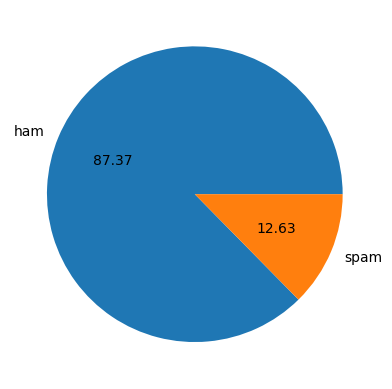

In [27]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [28]:
#data is imbalanced
import nltk

In [29]:
#df['text'].apply(len)
df['num_characters']=df['text'].apply(len)#introducing a new column in the dataset
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [30]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [31]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [32]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [33]:
df['num_senteces']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_senteces
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [34]:
df[['num_characters','num_words','num_senteces']].describe()

,num_characters,num_words,num_senteces
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [35]:
#ham messages
df[df['target']==0][['num_characters','num_words','num_senteces']].describe()

,num_characters,num_words,num_senteces
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [36]:
#spam
df[df['target']==1][['num_characters','num_words','num_senteces']].describe()

,num_characters,num_words,num_senteces
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [37]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

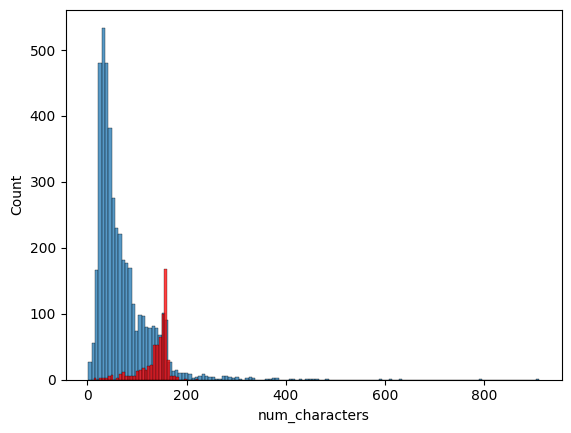

In [38]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')
#

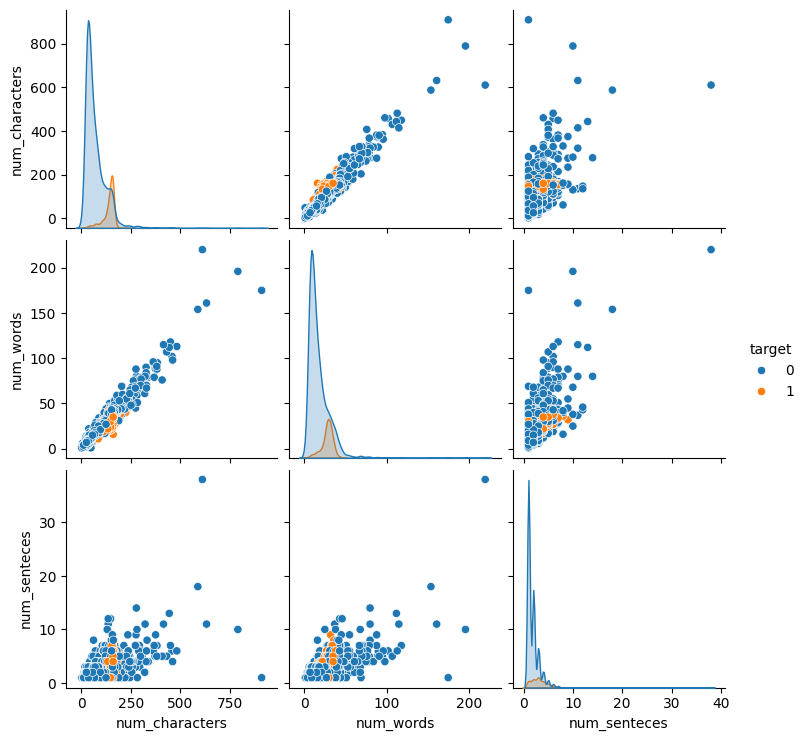

In [39]:
sns.pairplot(df,hue='target')

<Axes: >

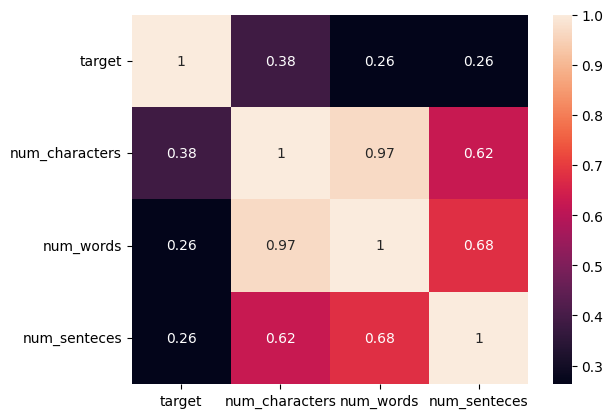

In [40]:
import seaborn as sns
sns.heatmap(df.corr(numeric_only=True),annot=True)

3.DATA PREPROCESSING
1.LOWER CASE
2.Tokenization
3.removing special chatacters
4.removing stop words and punctuation
5.stemming


In [41]:
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def transform_text(text):
  y = []
  text = text.lower()
  text = nltk.word_tokenize(text)

  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [46]:
import nltk
nltk.download('stopwords')
transform_text("Did you like my presentation on Ml")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


'like present ml'

In [47]:
df['text'][2000]

"But i'll b going 2 sch on mon. My sis need 2 take smth."

In [49]:
df['transformed_text']=df['text'].apply(transform_text)

In [48]:
df.head()

,target,text,num_characters,num_words,num_senteces
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [50]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [51]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

In [52]:
df['transformed_text'] = df['text'].apply(transform_text)

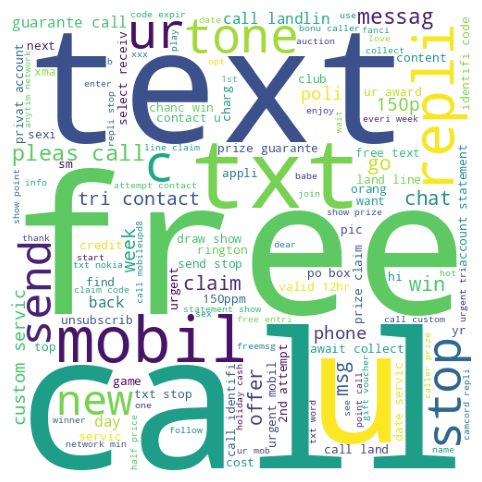

In [53]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

plt.figure(figsize=(12, 6))
plt.imshow(spam_wc)
plt.axis("off")
plt.show()

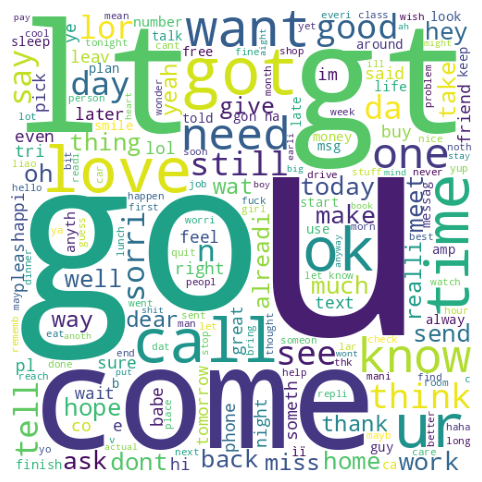

In [54]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

plt.figure(figsize=(12, 6))
plt.imshow(spam_wc)
plt.axis("off")
plt.show()

In [55]:
df.head()

,target,text,num_characters,num_words,num_senteces,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [56]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
  for words in msg.split():
    spam_corpus.append(words)

In [57]:
len(spam_corpus)

9939

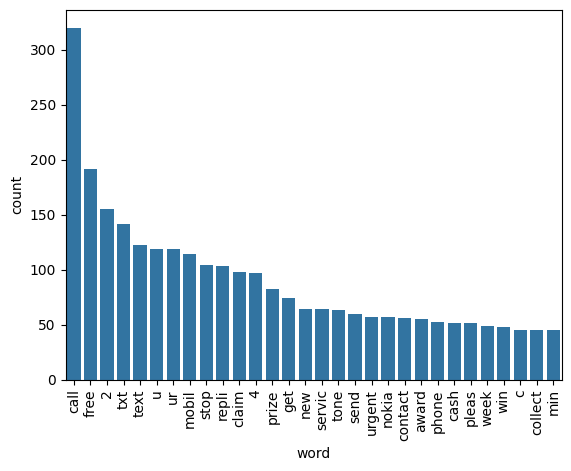

In [59]:
from collections import Counter
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

most_common_words = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])

sns.barplot(x='word', y='count', data=most_common_words)
plt.xticks(rotation='vertical')
plt.show()

4.MODEL BUILDING

In [69]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [70]:
X.shape


(5169, 6708)

In [72]:
y=df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [74]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [75]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [78]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [77]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [80]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver="liblinear",penalty="l1")
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)


In [81]:
clfs={
    "SVC":svc,
    "KN":knc,
    "NB":mnb,
    "DT":dtc,
    "LR":lrc,
    "RF":rfc,
    "AdaBoost":abc,
    "BgC":bc,
    "ETC":etc,
    "GBDT":gbdt,
    "xgb":xgb
}


In [82]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)
  accuracy=accuracy_score(y_test,y_pred)
  precision=precision_score(y_test,y_pred)

  return accuracy,precision


In [83]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9729206963249516, 0.9741379310344828)

In [87]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, f1_score

accuracy_scores=[]
precision_scores=[]
f1_scores=[]  # Initialize f1_scores list here

for name,clf in clfs.items():
  clf.fit(X_train,y_train) # Fit the classifier inside the loop
  y_pred=clf.predict(X_test)
  current_accuracy=accuracy_score(y_test,y_pred)
  current_precision=precision_score(y_test,y_pred)
  current_f1_score=f1_score(y_test,y_pred) # Calculate f1_score here

  print(f"{name} accuracy is {current_accuracy}")
  print(f"{name} precision is {current_precision}")
  print(f"{name} f1_score is {current_f1_score}") # Print f1_score

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)
  f1_scores.append(current_f1_score) # Append f1_score to the list

SVC accuracy is 0.9729206963249516
SVC precision is 0.9741379310344828
SVC f1_score is 0.889763779527559
KN accuracy is 0.9003868471953579
KN precision is 1.0
KN f1_score is 0.4046242774566474
NB accuracy is 0.9593810444874274
NB precision is 1.0
NB f1_score is 0.8205128205128205
DT accuracy is 0.9361702127659575
DT precision is 0.8461538461538461
DT f1_score is 0.7272727272727273
LR accuracy is 0.9516441005802708
LR precision is 0.94
LR f1_score is 0.7899159663865546
RF accuracy is 0.971953578336557
RF precision is 1.0
RF f1_score is 0.8825910931174089
AdaBoost accuracy is 0.9245647969052224
AdaBoost precision is 0.8409090909090909
AdaBoost f1_score is 0.6548672566371682
BgC accuracy is 0.9584139264990329
BgC precision is 0.8625954198473282
BgC f1_score is 0.8401486988847584
ETC accuracy is 0.9729206963249516
ETC precision is 0.9824561403508771
ETC f1_score is 0.8888888888888888
GBDT accuracy is 0.9526112185686654
GBDT precision is 0.9238095238095239
GBDT f1_score is 0.798353909465020

model improving

In [88]:
temp_df=pd.DataFrame({"algorithm":clfs.keys(),"accuracy":accuracy_scores,"precision":precision_scores,"f1_score":f1_scores})
display(temp_df) # Display the DataFrame

,algorithm,accuracy,precision,f1_score
0,SVC,0.972921,0.974138,0.889764
1,KN,0.900387,1.000000,0.404624
2,NB,0.959381,1.000000,0.820513
3,DT,0.936170,0.846154,0.727273
4,LR,0.951644,0.940000,0.789916
5,RF,0.971954,1.000000,0.882591
6,AdaBoost,0.924565,0.840909,0.654867
7,BgC,0.958414,0.862595,0.840149
8,ETC,0.972921,0.982456,0.888889
9,GBDT,0.952611,0.923810,0.798354


In [89]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))